In [1]:
using Revise

In [2]:
using MeshCatMechanisms
using MeshCat
using RigidBodyDynamics
using Flux
using ProgressMeter
using MLDataPattern
using JLD2
using Plots; gr()
using LCPSim
using LearningMPC
using LearningMPC.Models

INFO: Recompiling stale cache file /home/rdeits/locomotion/explorations/learning-mpc-2/packages/lib/v0.6/LearningMPC.ji for module LearningMPC.


In [3]:
robot = BoxAtlas()
mvis = MechanismVisualizer(robot)
IJuliaCell(mvis)

Listening on 127.0.0.1:7025...
zmq_url=tcp://127.0.0.1:6025
web_url=http://127.0.0.1:7025/static/


MeshCat.IJuliaCell(MeshCat.ViewerWindow(ZMQ.Context(Ptr{Void} @0x00000000072105d0, ZMQ.Socket[ZMQ.Socket(Ptr{Void} @0x000000000705c700, Base.Filesystem._FDWatcher(Ptr{Void} @0x0000000007235790, 105, (1, 0), Condition(Any[]), (false, false), 0))]), ZMQ.Socket(Ptr{Void} @0x000000000705c700, Base.Filesystem._FDWatcher(Ptr{Void} @0x0000000007235790, 105, (1, 0), Condition(Any[]), (false, false), 0)), "http://127.0.0.1:7025/static/", "tcp://127.0.0.1:6025", MeshCat.ZMQServer.ZMQWebSocketBridge(ip"127.0.0.1", Set{WebSockets.WebSocket}(), MeshCat.SceneTrees.SceneNode(Nullable{Array{UInt8,1}}(), Nullable{Array{UInt8,1}}(), Dict("meshcat"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0xa8, 0x2f, 0x6d, 0x65, 0x73, 0x68, 0x63, 0x61, 0x74], Dict("world"=>MeshCat.SceneTrees.SceneNode(#NULL, #NULL, Dict("root"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x77, 0x6f, 0x72, 0x6c, 0x64, 0x2f, 0x72, 0x6f, 0x6f, 0x74], Dict("floor"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x72, 0x6f, 0x6f, 0x74, 0x2f, 0x66, 0x6c, 0x6f, 0x6f, 0x72], Dict("after_root_to_floor"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x74, 0x5f, 0x74, 0x6f, 0x5f, 0x66, 0x6c, 0x6f, 0x6f, 0x72], Dict("geometry_1"=>MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31], Dict{String,MeshCat.SceneTrees.SceneNode}()))))),"core"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x2f, 0x72, 0x6f, 0x6f, 0x74, 0x2f, 0x63, 0x6f, 0x72, 0x65], Dict("rh_dummy"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x65, 0x2f, 0x72, 0x68, 0x5f, 0x64, 0x75, 0x6d, 0x6d, 0x79], Dict("after_core_to_rh_rotation"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0x5f, 0x72, 0x6f, 0x74, 0x61, 0x74, 0x69, 0x6f, 0x6e], Dict("geometry_4"=>MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x34], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x34], Dict{String,MeshCat.SceneTrees.SceneNode}()),"geometry_5"=>MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x35], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x35], Dict{String,MeshCat.SceneTrees.SceneNode}()))),"rh"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0x5f, 0x64, 0x75, 0x6d, 0x6d, 0x79, 0x2f, 0x72, 0x68], Dict("after_core_to_rh_extension"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x5f, 0x65, 0x78, 0x74, 0x65, 0x6e, 0x73, 0x69, 0x6f, 0x6e], Dict("geometry_6"=>MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x36], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x36], Dict{String,MeshCat.SceneTrees.SceneNode}()),"geometry_7"=>MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x37], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  

In [4]:
params = MPCParams(robot)
lqrsol = LQRSolution(robot, params, false)
net, loss = LearningMPC.interval_net([22, 64, 64, 1])
optimizer = Flux.ADAM(Flux.params(net))

net_cost = LearningMPC.LearnedCost(lqrsol, net)

net_mpc_params = MPCParams(robot)
net_mpc_params.horizon = 1
net_mpc_controller = MPCController(robot, net_mpc_params, net_cost, [lqrsol]);

full_mpc_controller = MPCController(robot, params, lqrsol, [lqrsol, net_mpc_controller]);

lqr_mpc_controller = MPCController(robot, (p = MPCParams(robot); p.horizon=1; p), lqrsol, [lqrsol])

(::MPCController) (generic function with 1 method)

In [5]:
sample_sink = LearningMPC.MPCSampleSink{Float64}(true)
playback_sink = LearningMPC.PlaybackSink(mvis, params.Δt)

full_mpc_controller.callback = LearningMPC.call_each(
    sample_sink,
#     playback_sink,
)

live_viewer = LearningMPC.live_viewer(mvis)

dagger_controller = LearningMPC.call_each(
    LearningMPC.dagger_controller(
        full_mpc_controller,
        net_mpc_controller,
        0.2),
    live_viewer
    )

dataset = LearningMPC.Dataset(lqrsol)

x_init = nominal_state(robot)

function collect_into!(data::Vector{<:LearningMPC.Sample}, σv=1.0)
    empty!(sample_sink)
    LearningMPC.randomize!(x0, x_init, 0.0, σv)
    results = LCPSim.simulate(x0, 
        dagger_controller,
        robot.environment, params.Δt, 100, 
        params.lcp_solver;
        termination=x -> configuration(x)[3] > π/4 || configuration(x)[3] < -π/4);
    append!(data, sample_sink.samples)
end

x0 = MechanismState{Float64}(robot.mechanism)

features(s::LearningMPC.Sample) = (s.state, s.mip.objective_bound, s.mip.objective_value)

features (generic function with 1 method)

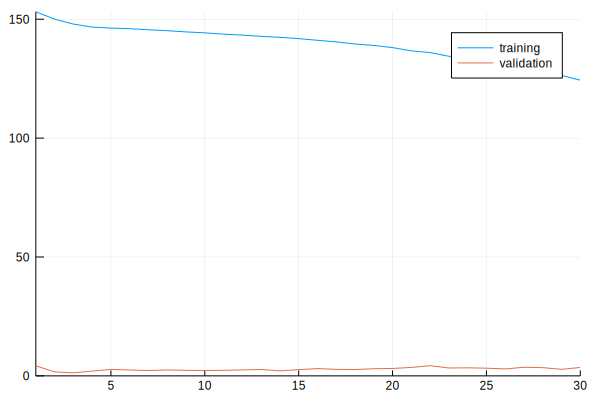

  2.367781 seconds (1.55 M allocations: 96.194 MiB, 2.77% gc time)


Progress:   1%|                                         |  ETA: 15:31:34

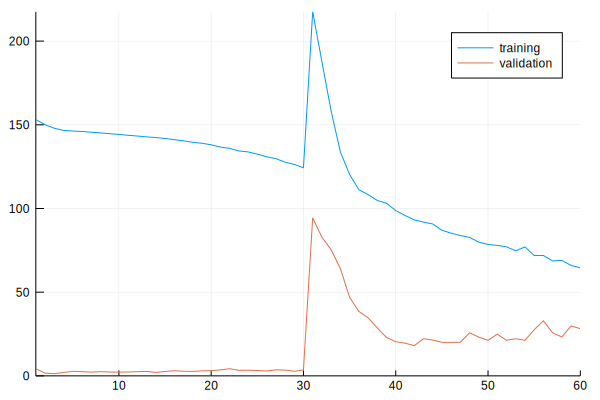

  1.324104 seconds (1.30 M allocations: 114.653 MiB, 2.57% gc time)


Progress:   2%|█                                        |  ETA: 15:58:37

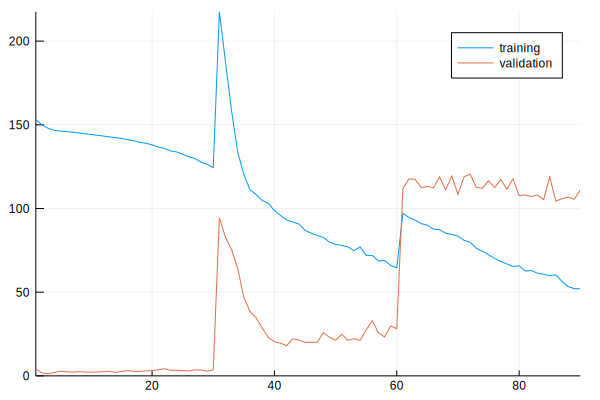

  1.399495 seconds (1.46 M allocations: 129.368 MiB, 3.51% gc time)


Progress:   3%|█                                        |  ETA: 11:43:28

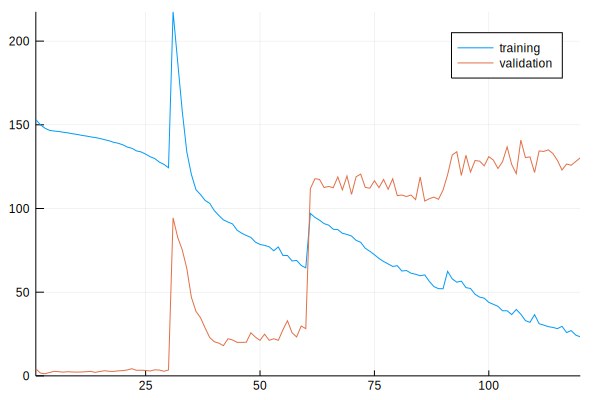

  1.748950 seconds (1.79 M allocations: 158.450 MiB, 3.20% gc time)


Progress:   4%|██                                       |  ETA: 10:20:51

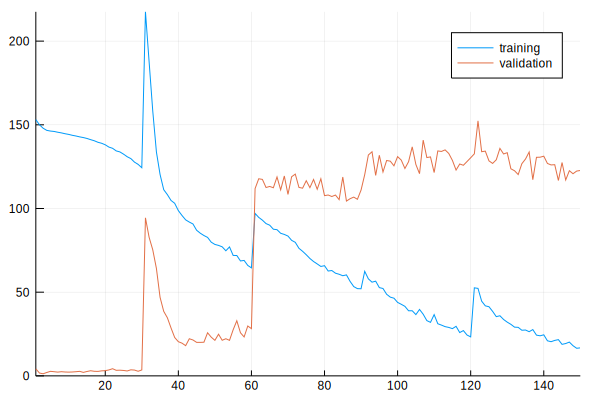

  2.257464 seconds (2.33 M allocations: 205.537 MiB, 3.15% gc time)


Progress:   5%|██                                       |  ETA: 10:19:03

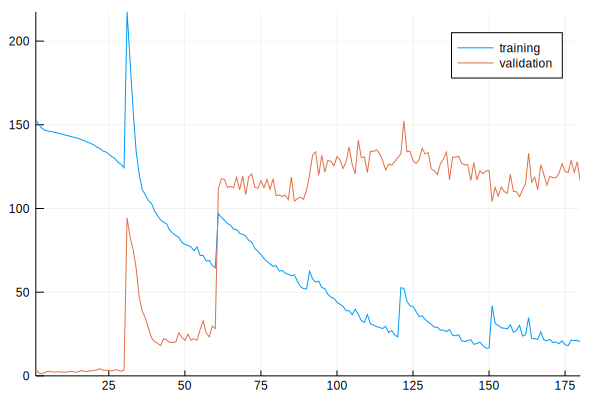

  3.011528 seconds (3.15 M allocations: 276.399 MiB, 3.60% gc time)


Progress:   6%|██                                       |  ETA: 11:16:30

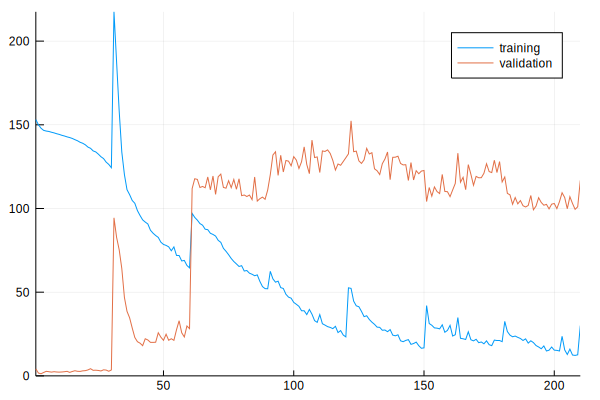

  3.652763 seconds (3.75 M allocations: 329.261 MiB, 2.41% gc time)


Progress:   7%|███                                      |  ETA: 11:28:40

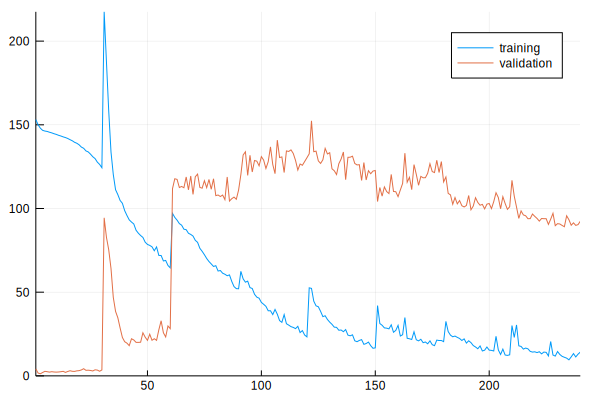

  4.278032 seconds (4.36 M allocations: 383.931 MiB, 3.44% gc time)


Progress:   8%|███                                      |  ETA: 11:44:28

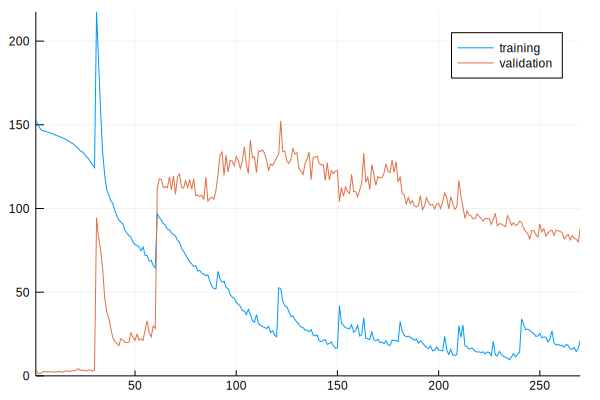

  4.722613 seconds (4.99 M allocations: 438.823 MiB, 2.85% gc time)


Progress:   9%|████                                     |  ETA: 11:53:20

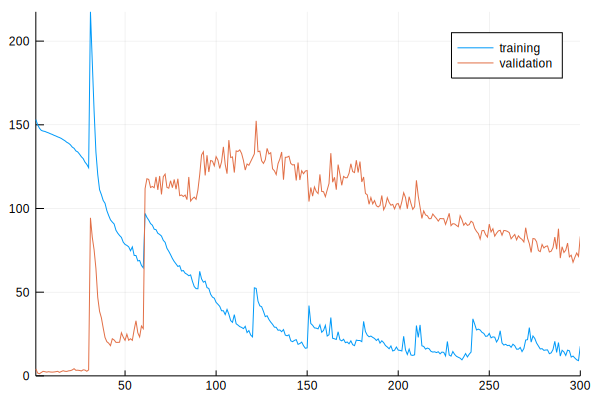

  5.287725 seconds (5.62 M allocations: 494.676 MiB, 3.10% gc time)


Progress:  10%|████                                     |  ETA: 11:54:32

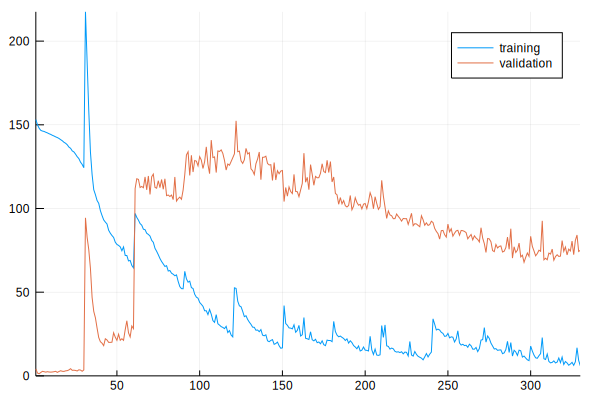

  5.962309 seconds (6.30 M allocations: 554.303 MiB, 3.16% gc time)


Progress:  11%|█████                                    |  ETA: 12:11:36

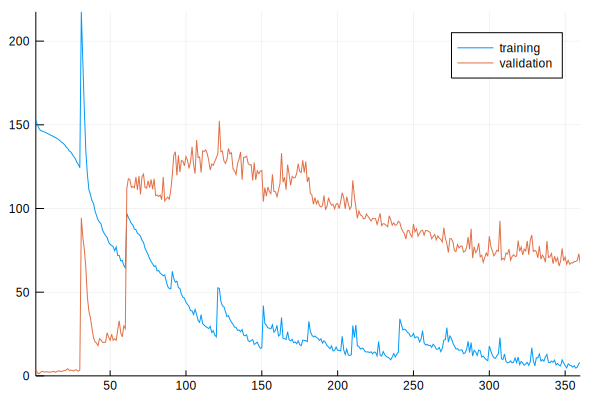

  6.670825 seconds (7.09 M allocations: 623.631 MiB, 3.70% gc time)


Progress:  12%|█████                                    |  ETA: 12:20:44

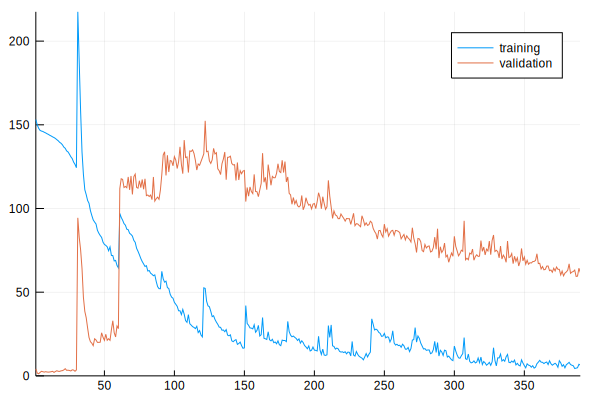

  7.507828 seconds (8.01 M allocations: 704.464 MiB, 2.88% gc time)


Progress:  13%|█████                                    |  ETA: 12:32:18

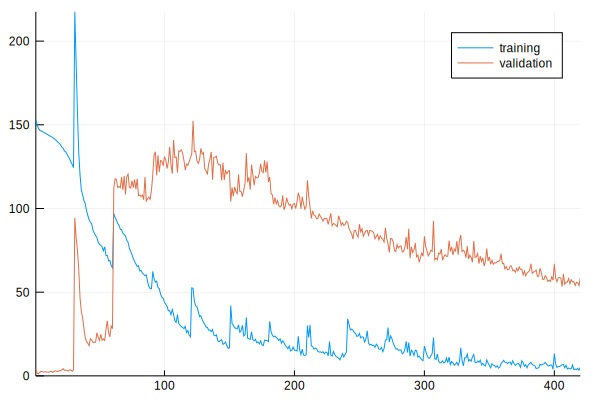

  8.423412 seconds (8.80 M allocations: 773.927 MiB, 3.53% gc time)


Progress:  14%|██████                                   |  ETA: 12:36:37

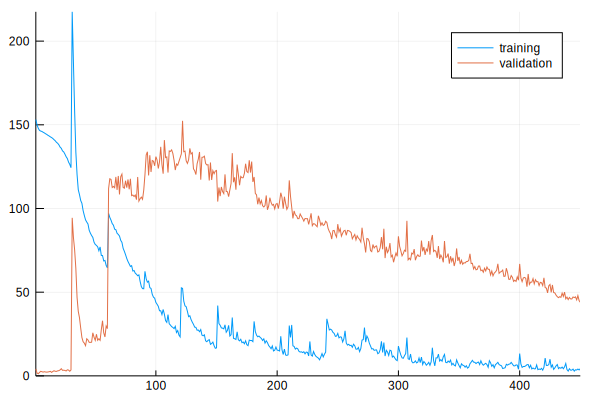

  8.944675 seconds (9.65 M allocations: 848.827 MiB, 2.43% gc time)


Progress:  15%|██████                                   |  ETA: 12:42:15

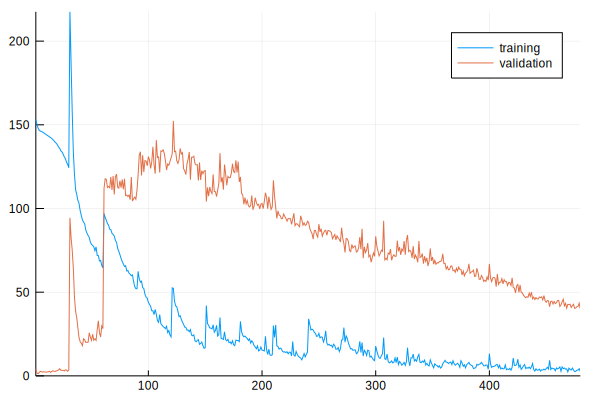

 10.004600 seconds (10.45 M allocations: 919.613 MiB, 3.15% gc time)


Progress:  16%|███████                                  |  ETA: 12:41:24

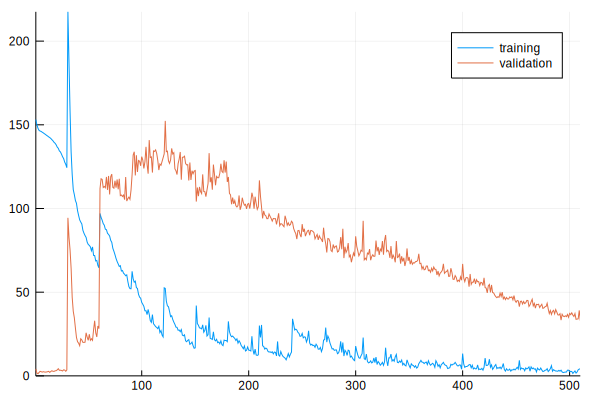

 10.172115 seconds (10.89 M allocations: 958.455 MiB, 3.01% gc time)


Progress:  17%|███████                                  |  ETA: 12:29:12

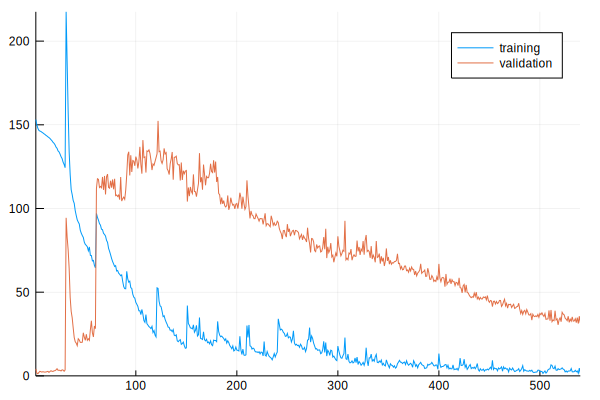

 10.808554 seconds (11.64 M allocations: 1023.610 MiB, 2.94% gc time)


Progress:  18%|███████                                  |  ETA: 12:23:36

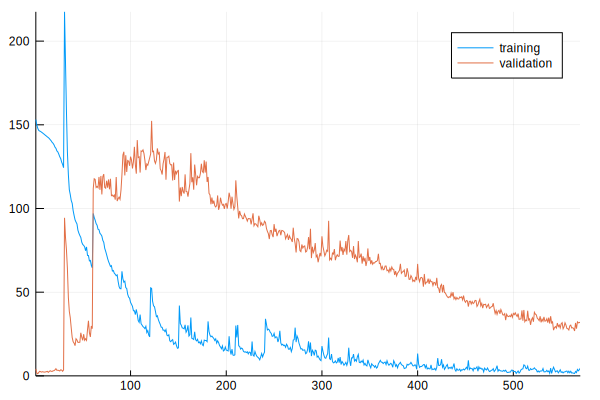

 11.643663 seconds (12.34 M allocations: 1.060 GiB, 3.41% gc time)


Progress:  19%|████████                                 |  ETA: 12:21:50

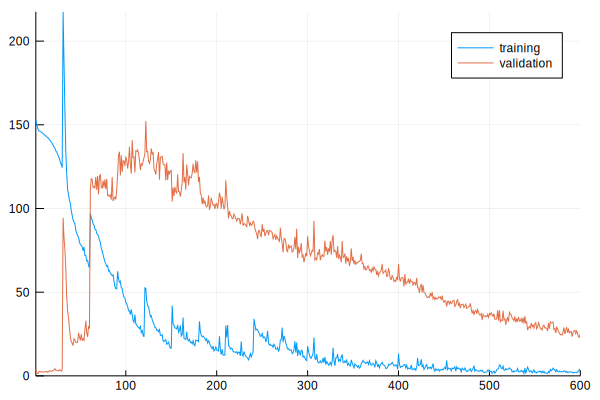

 12.428692 seconds (13.08 M allocations: 1.124 GiB, 3.68% gc time)


Progress:  20%|████████                                 |  ETA: 12:18:12

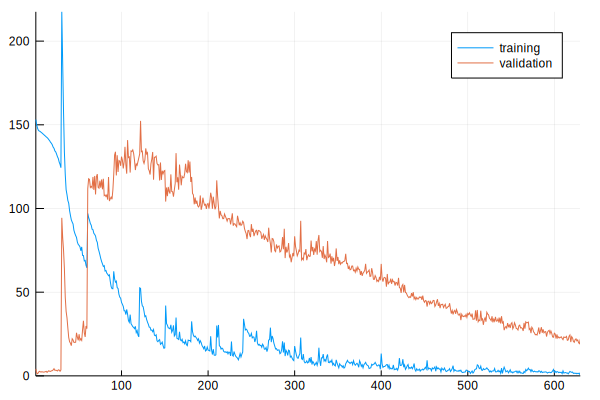

 13.325976 seconds (13.89 M allocations: 1.193 GiB, 2.95% gc time)


Progress:  21%|█████████                                |  ETA: 12:13:28

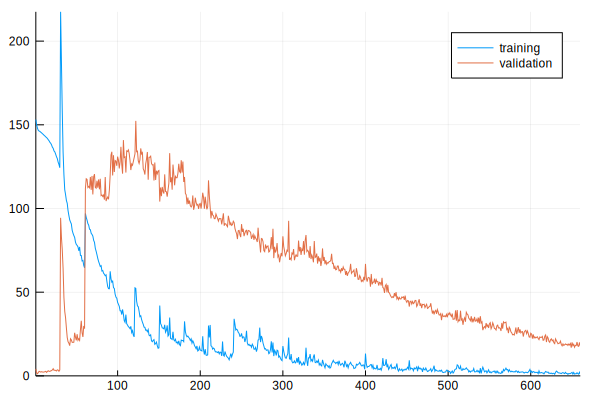

 13.640687 seconds (14.58 M allocations: 1.252 GiB, 2.99% gc time)


Progress:  22%|█████████                                |  ETA: 12:07:23

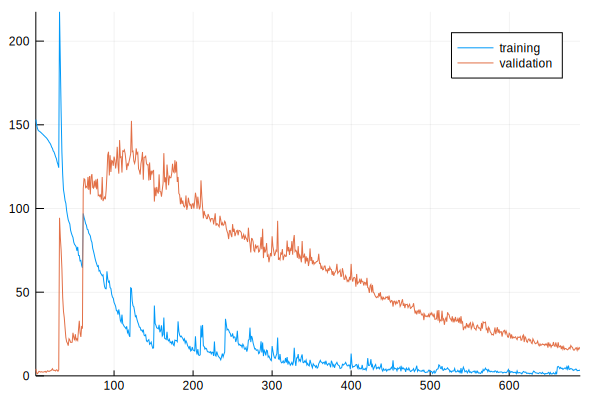

 14.624502 seconds (15.17 M allocations: 1.303 GiB, 2.77% gc time)


Progress:  23%|█████████                                |  ETA: 11:55:24

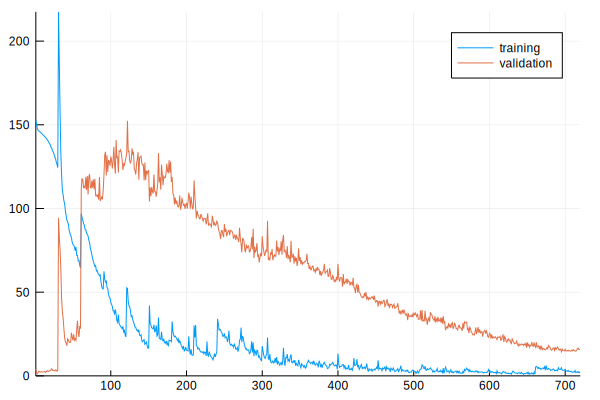

 14.571159 seconds (15.75 M allocations: 1.353 GiB, 2.58% gc time)


Progress:  24%|██████████                               |  ETA: 11:47:18

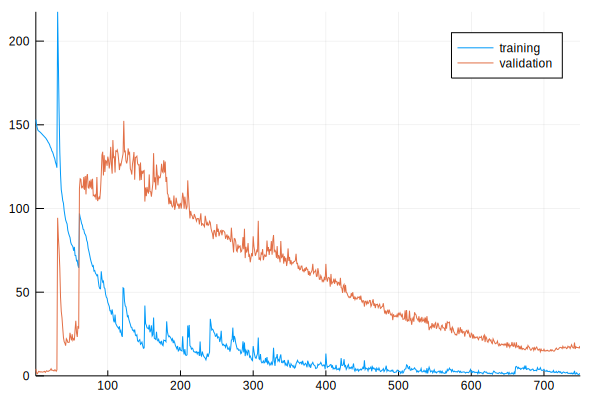

 15.297692 seconds (16.57 M allocations: 1.423 GiB, 2.63% gc time)


Progress:  25%|██████████                               |  ETA: 11:40:30

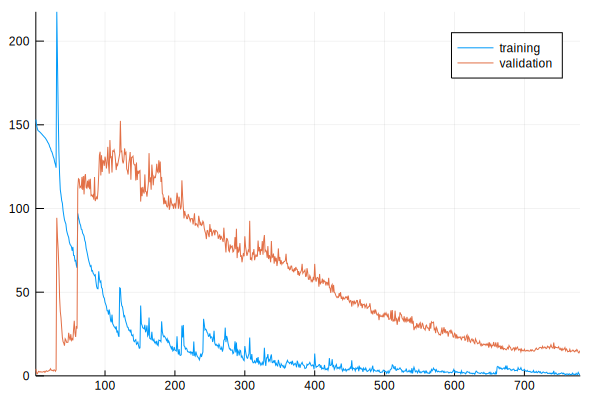

 16.050266 seconds (17.28 M allocations: 1.484 GiB, 2.56% gc time)


Progress:  26%|███████████                              |  ETA: 11:32:15

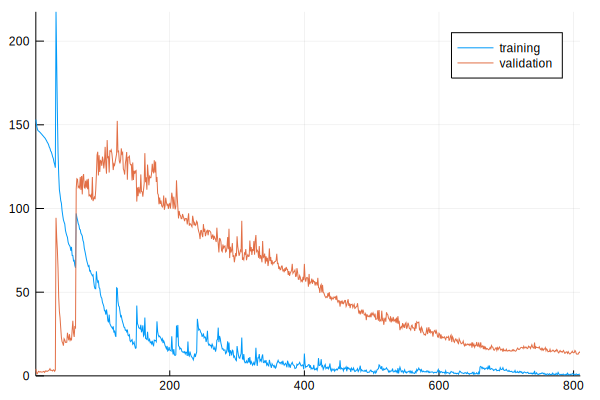

 16.766345 seconds (17.92 M allocations: 1.540 GiB, 3.46% gc time)


Progress:  27%|███████████                              |  ETA: 11:24:10

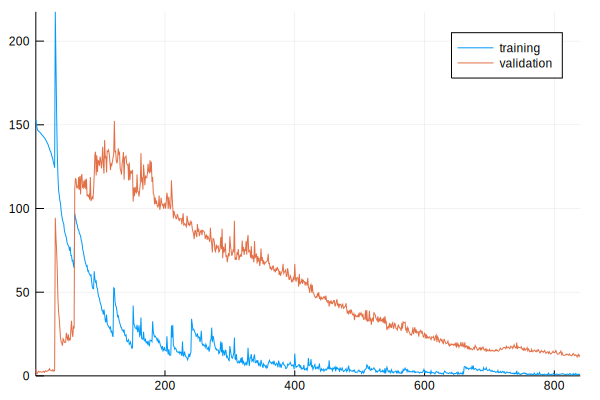

 17.265402 seconds (18.58 M allocations: 1.596 GiB, 3.17% gc time)


Progress:  28%|███████████                              |  ETA: 11:16:24

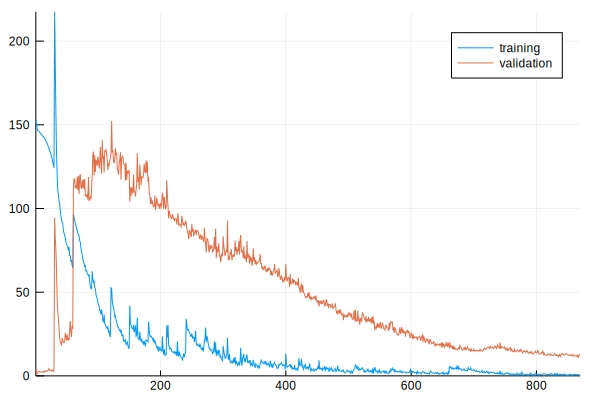

 17.897234 seconds (19.11 M allocations: 1.641 GiB, 3.67% gc time)


Progress:  29%|████████████                             |  ETA: 11:03:36

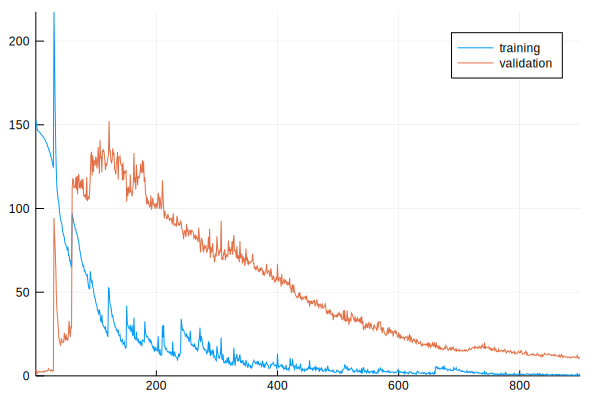

 18.651718 seconds (19.82 M allocations: 1.702 GiB, 3.19% gc time)


Progress:  30%|████████████                             |  ETA: 10:57:14

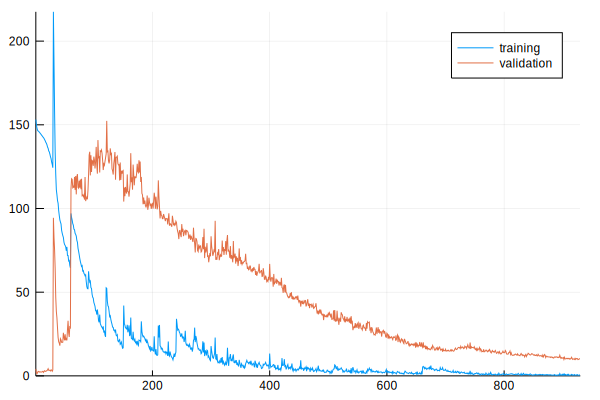

 19.203346 seconds (20.62 M allocations: 1.771 GiB, 2.61% gc time)


Progress:  31%|█████████████                            |  ETA: 10:54:14

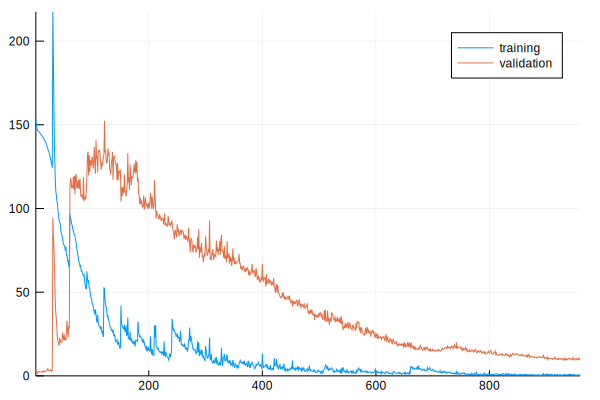

 19.696022 seconds (21.14 M allocations: 1.816 GiB, 2.97% gc time)


Progress:  32%|█████████████                            |  ETA: 10:43:55

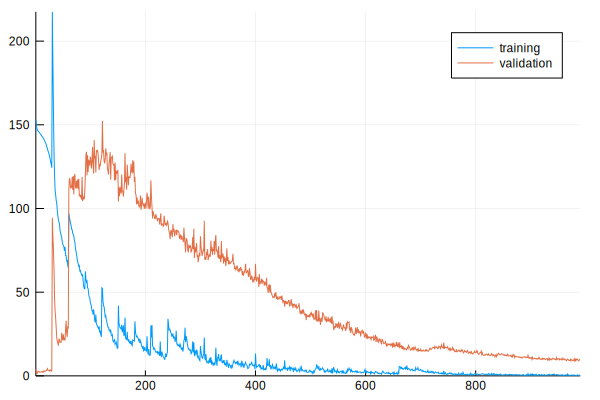

 20.433474 seconds (21.99 M allocations: 1.889 GiB, 3.12% gc time)


Progress:  33%|██████████████                           |  ETA: 10:38:34

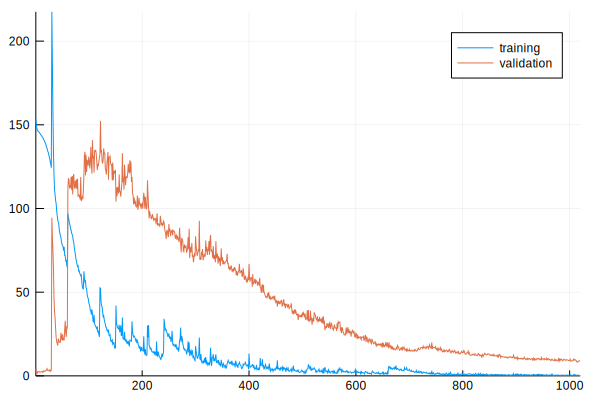

 21.352678 seconds (22.57 M allocations: 1.939 GiB, 3.39% gc time)


Progress:  34%|██████████████                           |  ETA: 10:28:51

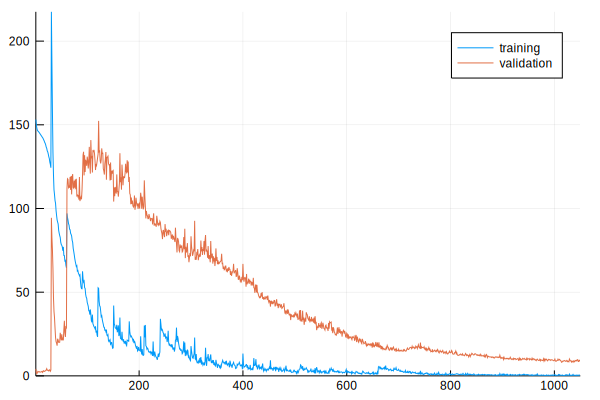

 21.751146 seconds (23.33 M allocations: 2.005 GiB, 2.95% gc time)


Progress:  35%|██████████████                           |  ETA: 10:21:47

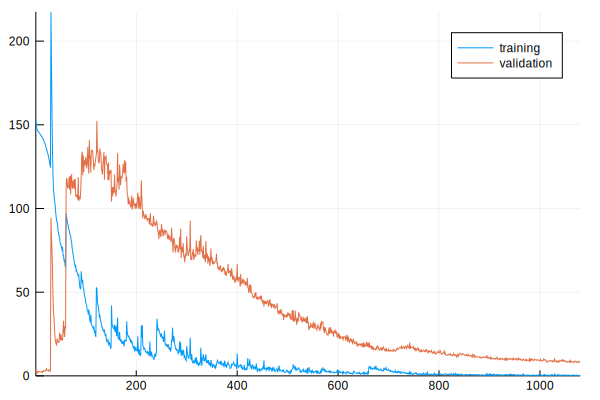

 22.436699 seconds (24.27 M allocations: 2.085 GiB, 2.80% gc time)


Progress:  36%|███████████████                          |  ETA: 10:15:00

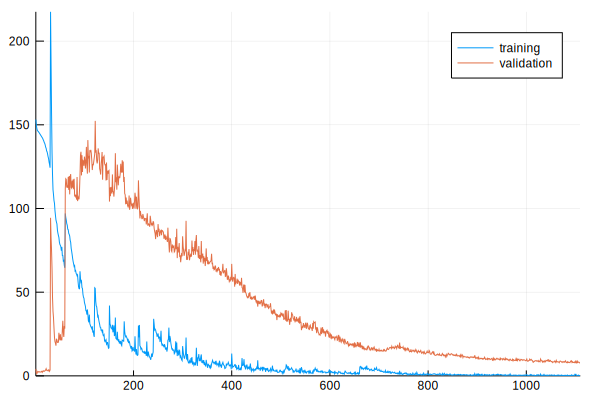

 23.403699 seconds (24.91 M allocations: 2.140 GiB, 3.61% gc time)


Progress:  37%|███████████████                          |  ETA: 10:05:31

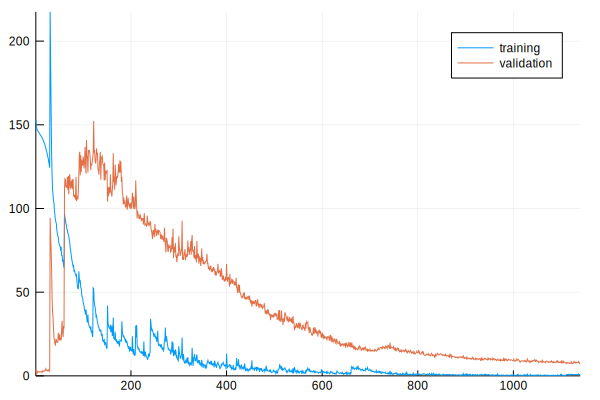

 23.935063 seconds (25.61 M allocations: 2.200 GiB, 3.49% gc time)


Progress:  38%|████████████████                         |  ETA: 9:58:36

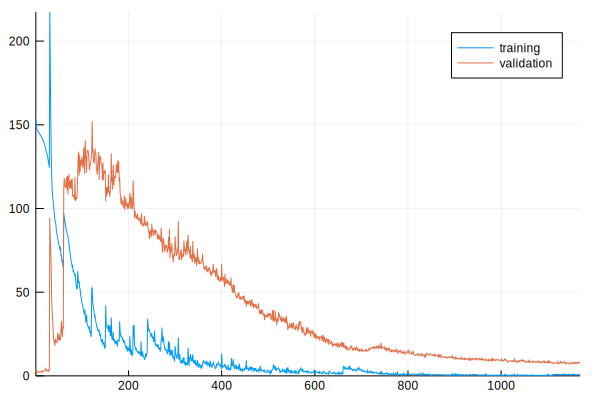

 24.267367 seconds (26.25 M allocations: 2.255 GiB, 2.50% gc time)


Progress:  39%|████████████████                         |  ETA: 9:50:23

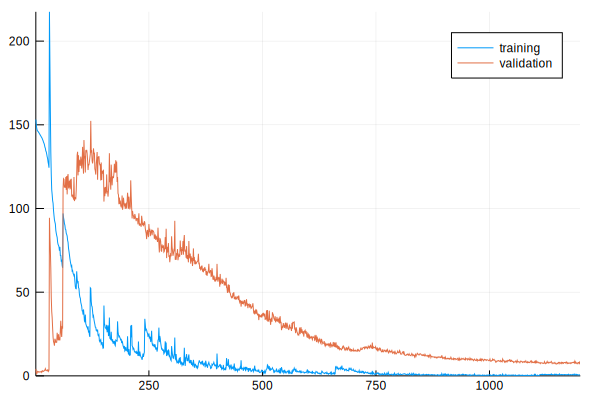

 25.298468 seconds (27.03 M allocations: 2.323 GiB, 3.07% gc time)


Progress:  40%|████████████████                         |  ETA: 9:42:21

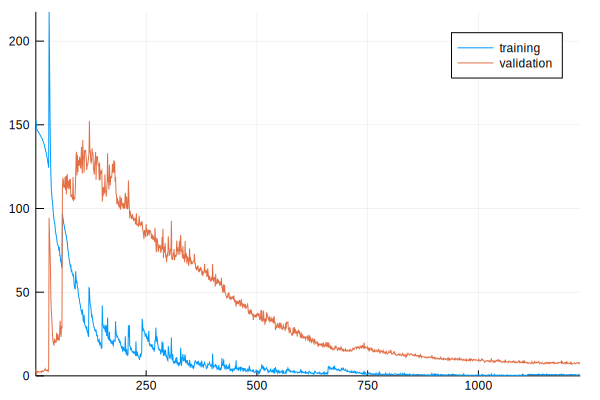

 26.039995 seconds (27.66 M allocations: 2.378 GiB, 3.65% gc time)


Progress:  41%|█████████████████                        |  ETA: 9:32:50

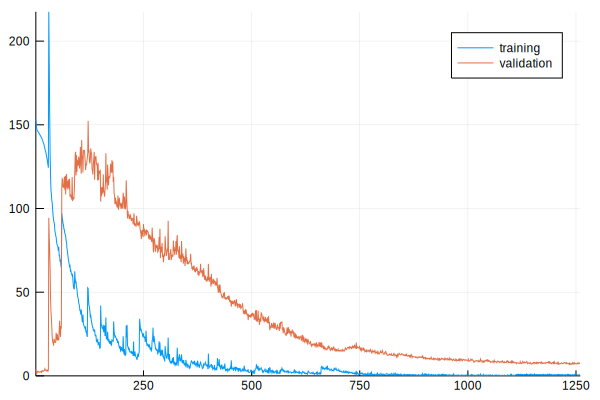

 26.850650 seconds (28.42 M allocations: 2.443 GiB, 3.37% gc time)


Progress:  42%|█████████████████                        |  ETA: 9:23:40

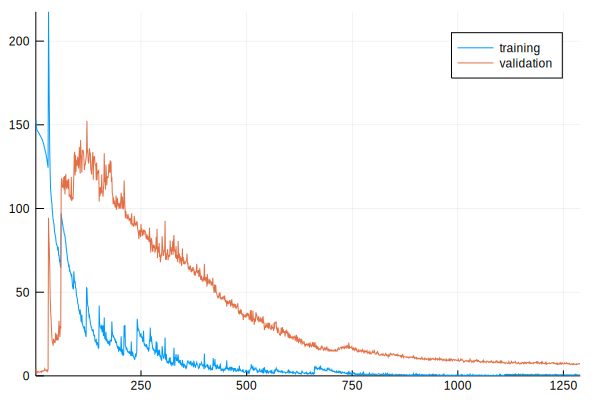

 26.902617 seconds (28.95 M allocations: 2.488 GiB, 2.82% gc time)


Progress:  43%|██████████████████                       |  ETA: 9:11:53

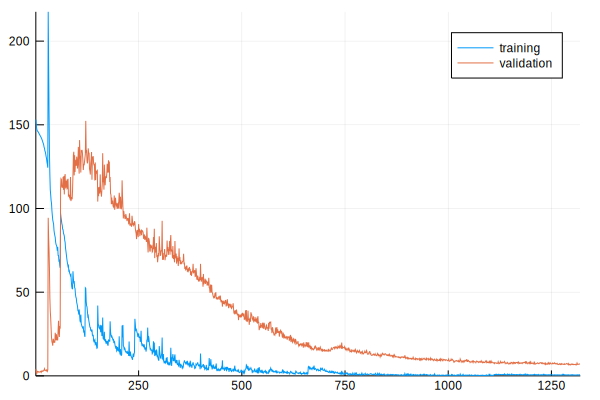

 27.736480 seconds (29.59 M allocations: 2.544 GiB, 3.46% gc time)


Progress:  44%|██████████████████                       |  ETA: 9:02:17

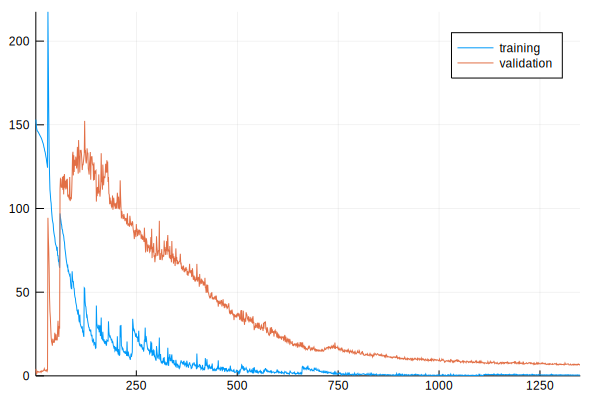

 28.069927 seconds (30.41 M allocations: 2.614 GiB, 2.63% gc time)


Progress:  45%|██████████████████                       |  ETA: 8:55:30

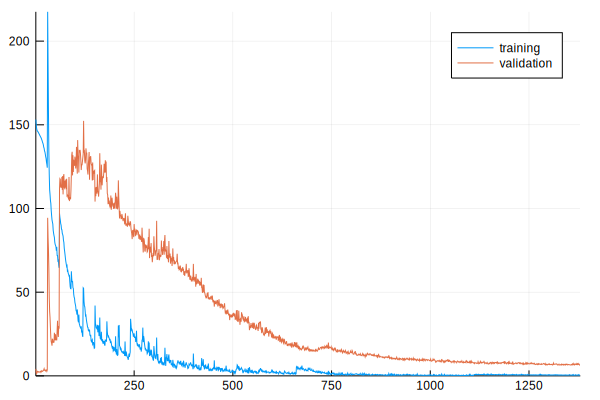

 28.803258 seconds (31.21 M allocations: 2.683 GiB, 2.48% gc time)


Progress:  46%|███████████████████                      |  ETA: 8:47:50

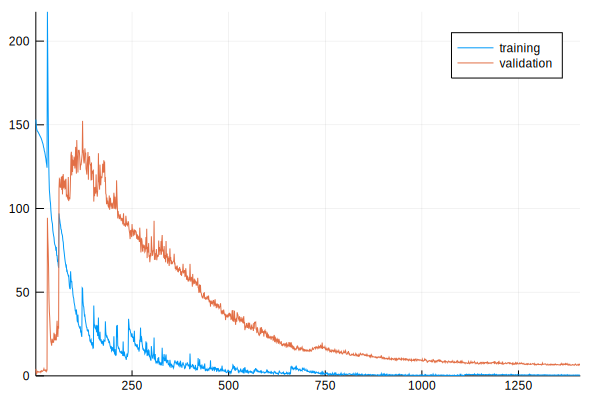

 29.575744 seconds (31.93 M allocations: 2.745 GiB, 3.06% gc time)


Progress:  47%|███████████████████                      |  ETA: 8:39:15

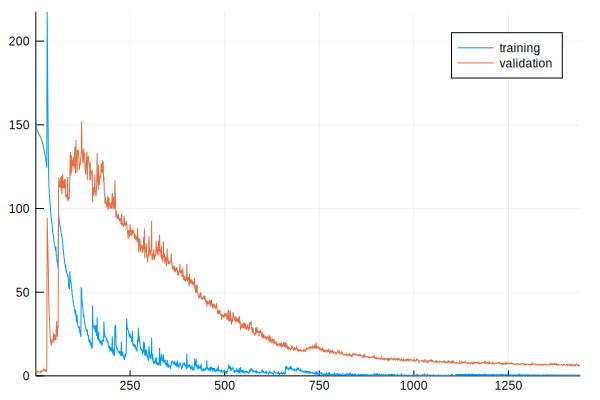

 30.656036 seconds (32.58 M allocations: 2.801 GiB, 3.57% gc time)


Progress:  48%|████████████████████                     |  ETA: 8:29:18

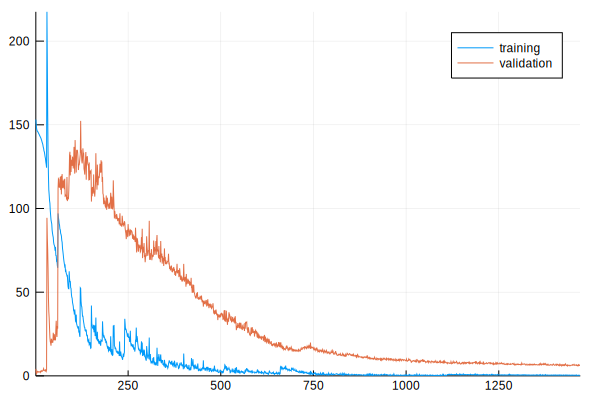

 31.230056 seconds (33.28 M allocations: 2.861 GiB, 3.38% gc time)


Progress:  49%|████████████████████                     |  ETA: 8:19:39

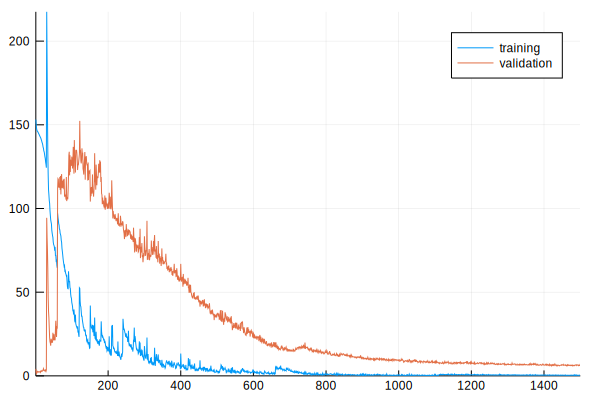

 31.205416 seconds (33.64 M allocations: 2.893 GiB, 2.81% gc time)


Progress:  50%|████████████████████                     |  ETA: 8:07:08

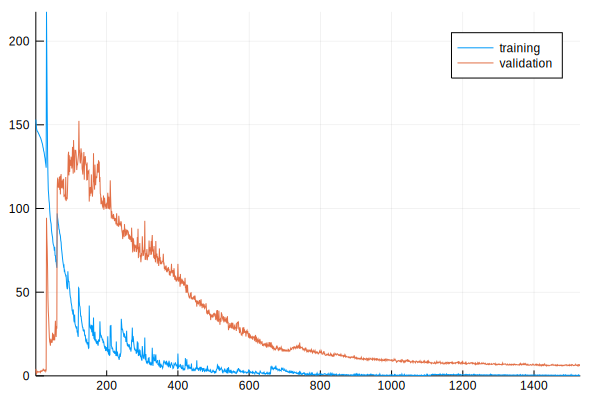

 31.484378 seconds (34.32 M allocations: 2.951 GiB, 2.64% gc time)


Progress:  51%|█████████████████████                    |  ETA: 7:57:45

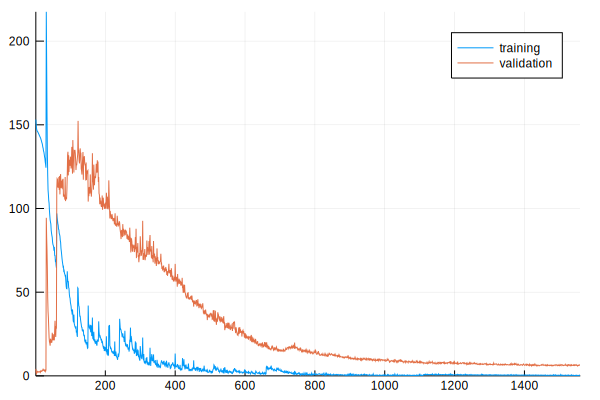

 32.755590 seconds (34.94 M allocations: 3.004 GiB, 3.53% gc time)


Progress:  52%|█████████████████████                    |  ETA: 7:48:23

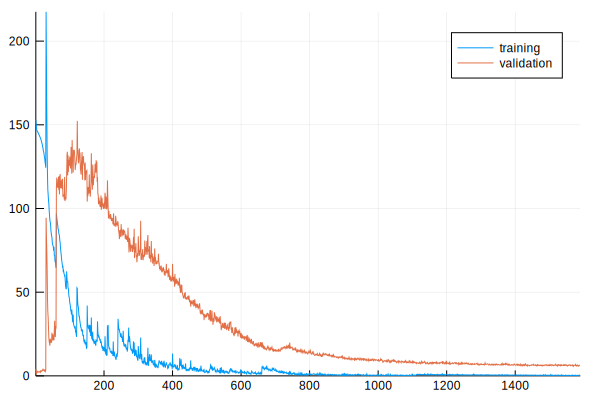

 33.432312 seconds (35.63 M allocations: 3.064 GiB, 3.42% gc time)


Progress:  53%|██████████████████████                   |  ETA: 7:40:00

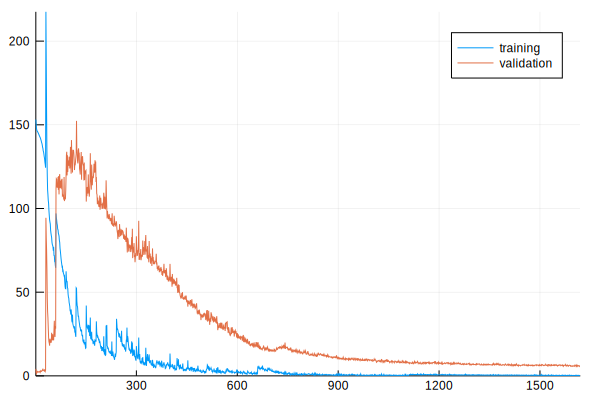

 33.438519 seconds (36.38 M allocations: 3.129 GiB, 2.50% gc time)


Progress:  54%|██████████████████████                   |  ETA: 7:31:53

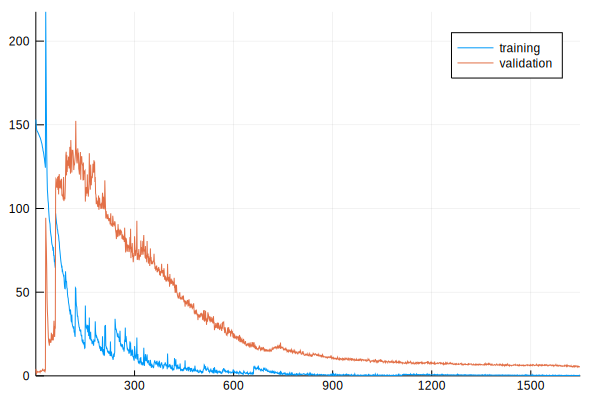

 34.652985 seconds (37.14 M allocations: 3.193 GiB, 3.01% gc time)


Progress:  55%|███████████████████████                  |  ETA: 7:22:43

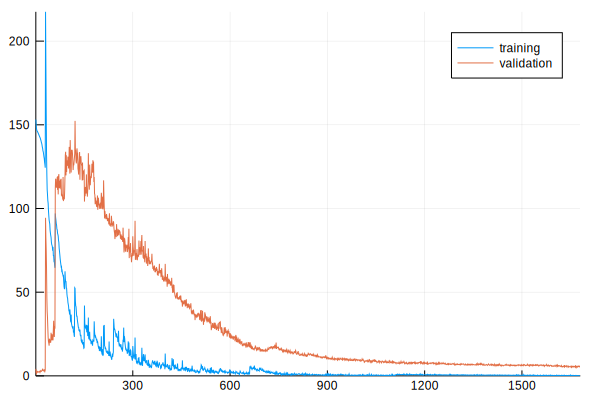

 35.586481 seconds (37.95 M allocations: 3.263 GiB, 3.41% gc time)


Progress:  56%|███████████████████████                  |  ETA: 7:14:43

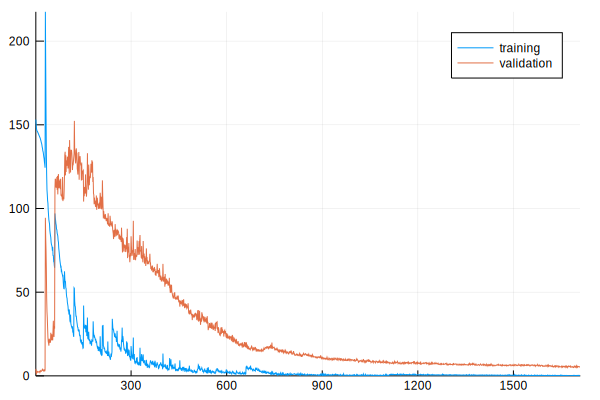

 36.085612 seconds (38.73 M allocations: 3.330 GiB, 2.47% gc time)


Progress:  57%|███████████████████████                  |  ETA: 7:05:33

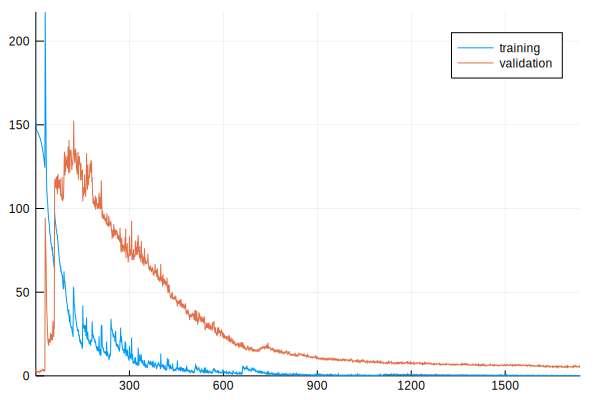

 36.657772 seconds (39.43 M allocations: 3.391 GiB, 3.25% gc time)


Progress:  58%|████████████████████████                 |  ETA: 6:56:38

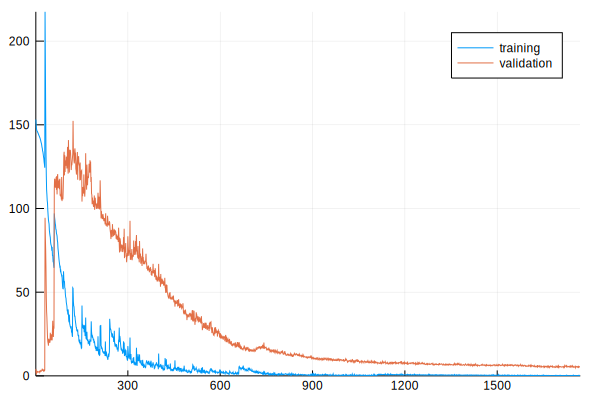

 37.656428 seconds (40.10 M allocations: 3.448 GiB, 3.88% gc time)


Progress:  59%|████████████████████████                 |  ETA: 6:46:31

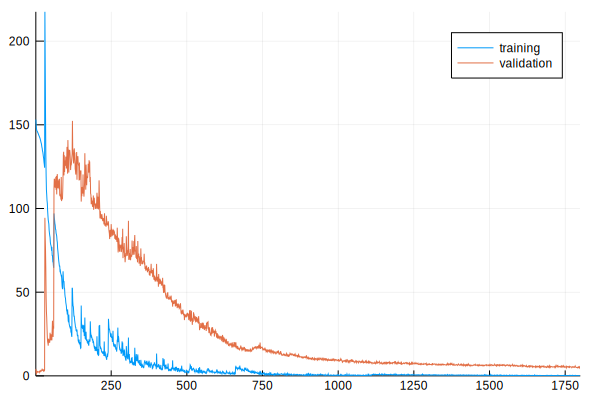

 38.438166 seconds (40.93 M allocations: 3.519 GiB, 3.00% gc time)


Progress:  60%|█████████████████████████                |  ETA: 6:37:57

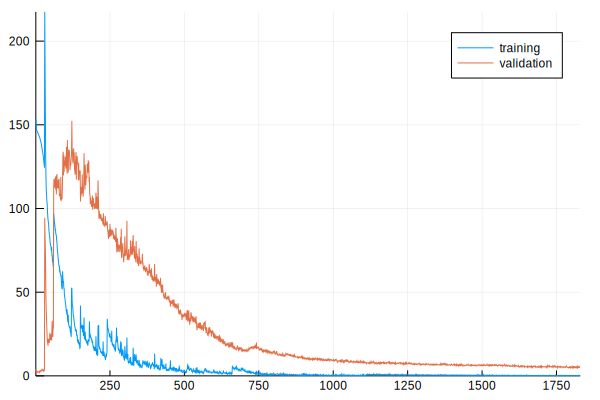

 39.263073 seconds (41.80 M allocations: 3.594 GiB, 3.61% gc time)


Progress:  61%|█████████████████████████                |  ETA: 6:29:36

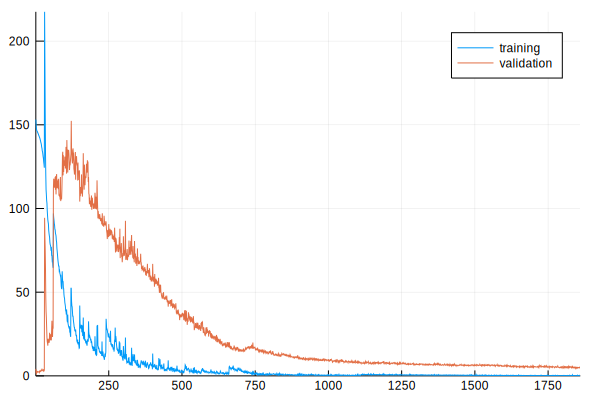

 39.574969 seconds (42.37 M allocations: 3.643 GiB, 3.22% gc time)


Progress:  62%|█████████████████████████                |  ETA: 6:18:48

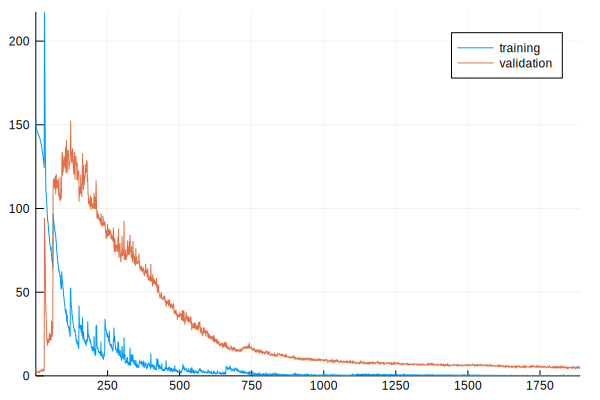

 40.156310 seconds (43.11 M allocations: 3.707 GiB, 2.98% gc time)


Progress:  63%|██████████████████████████               |  ETA: 6:09:43

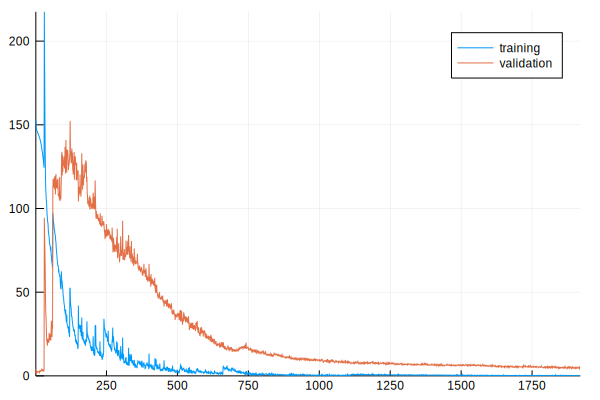

 40.402442 seconds (43.74 M allocations: 3.761 GiB, 2.51% gc time)


Progress:  64%|██████████████████████████               |  ETA: 5:59:46

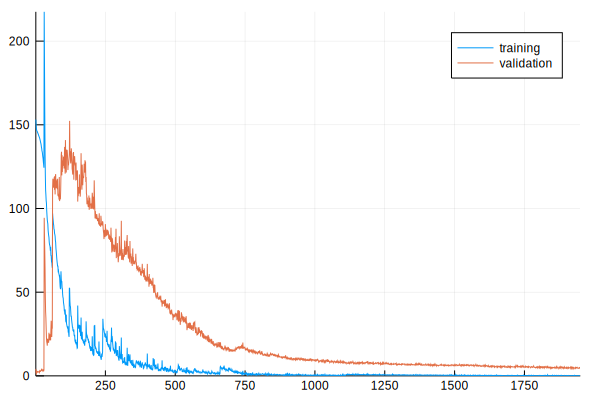

 41.441827 seconds (44.54 M allocations: 3.830 GiB, 2.84% gc time)


Progress:  65%|███████████████████████████              |  ETA: 5:50:51

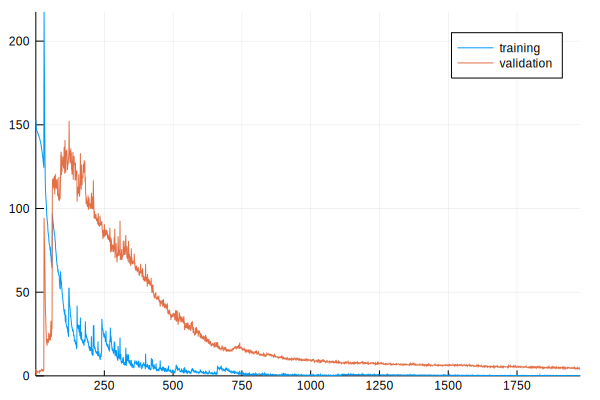

 42.409681 seconds (45.16 M allocations: 3.883 GiB, 3.49% gc time)


Progress:  66%|███████████████████████████              |  ETA: 5:40:54

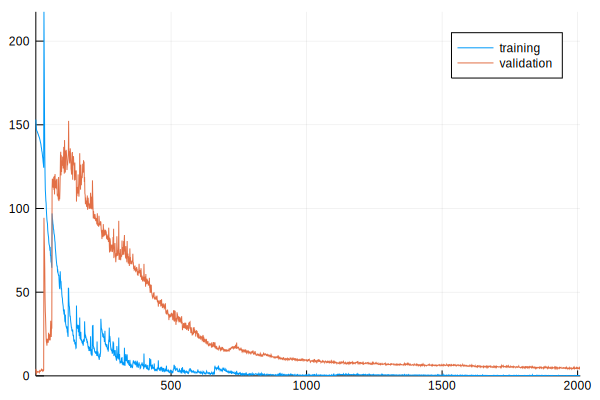

 42.501650 seconds (45.90 M allocations: 3.947 GiB, 2.51% gc time)


Progress:  67%|███████████████████████████              |  ETA: 5:31:16

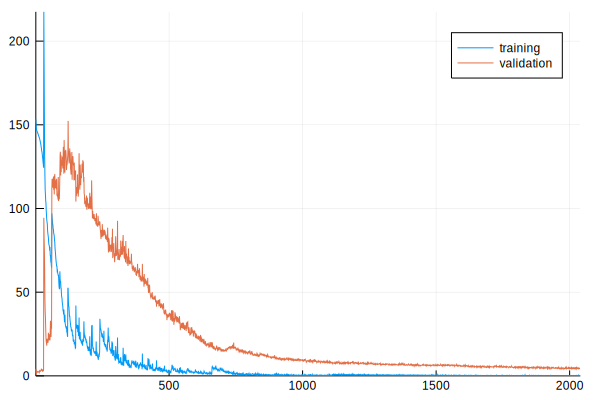

 44.031007 seconds (46.69 M allocations: 4.014 GiB, 3.58% gc time)


Progress:  68%|████████████████████████████             |  ETA: 5:21:55

 43.662188 seconds (47.13 M allocations: 4.053 GiB, 2.50% gc time)


Progress:  69%|████████████████████████████             |  ETA: 5:11:36

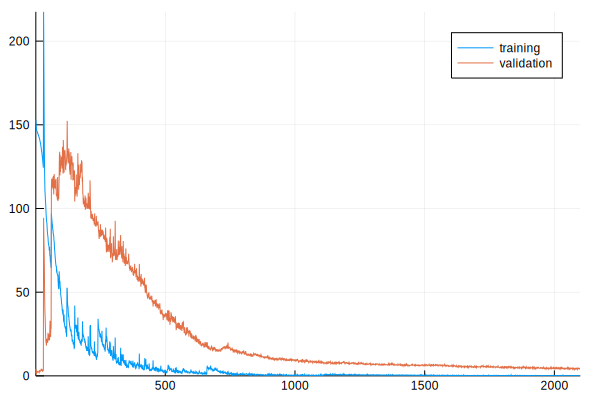

 44.144512 seconds (47.55 M allocations: 4.089 GiB, 3.01% gc time)


Progress:  70%|█████████████████████████████            |  ETA: 5:00:54

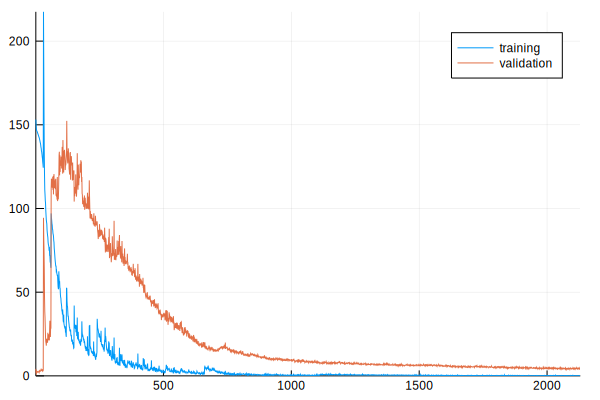

 45.695992 seconds (48.52 M allocations: 4.173 GiB, 3.53% gc time)


Progress:  71%|█████████████████████████████            |  ETA: 4:52:25

 45.975342 seconds (49.25 M allocations: 4.236 GiB, 3.31% gc time)


Progress:  72%|██████████████████████████████           |  ETA: 4:42:57

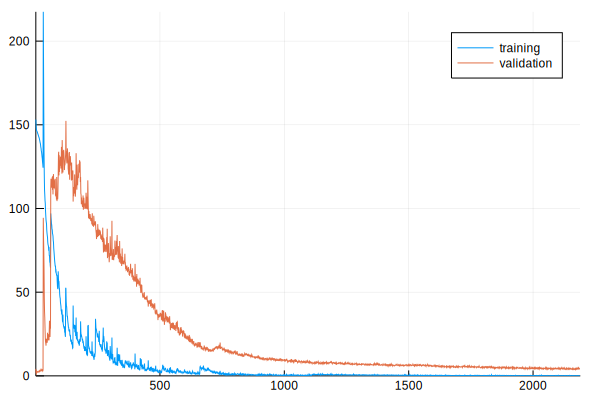

 46.734378 seconds (49.97 M allocations: 4.299 GiB, 2.88% gc time)


Progress:  73%|██████████████████████████████           |  ETA: 4:32:56

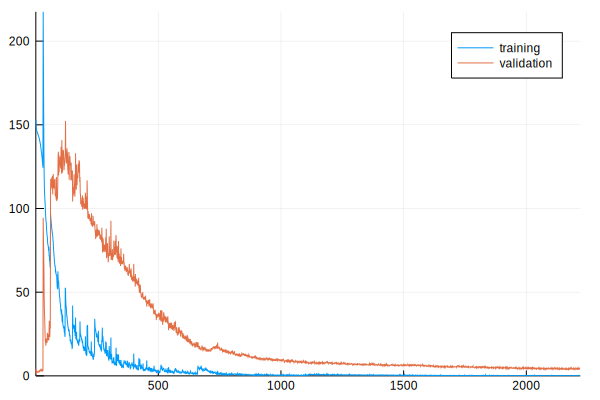

 47.399219 seconds (50.76 M allocations: 4.367 GiB, 3.11% gc time)


Progress:  74%|██████████████████████████████           |  ETA: 4:23:28

 48.171119 seconds (51.59 M allocations: 4.438 GiB, 3.12% gc time)


Progress:  75%|███████████████████████████████          |  ETA: 4:13:52

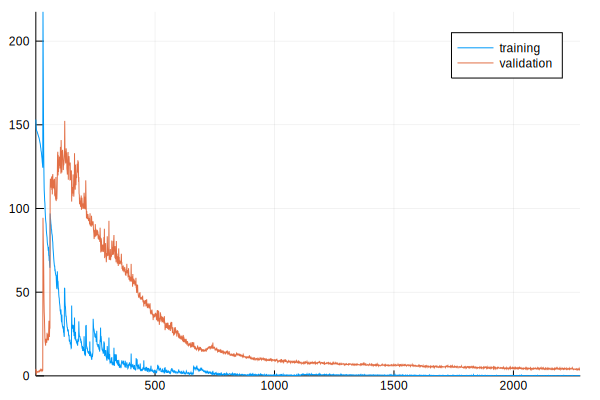

 49.301565 seconds (52.26 M allocations: 4.496 GiB, 3.20% gc time)


Progress:  76%|███████████████████████████████          |  ETA: 4:03:53

 50.074299 seconds (52.95 M allocations: 4.554 GiB, 3.42% gc time)


Progress:  77%|████████████████████████████████         |  ETA: 3:53:54

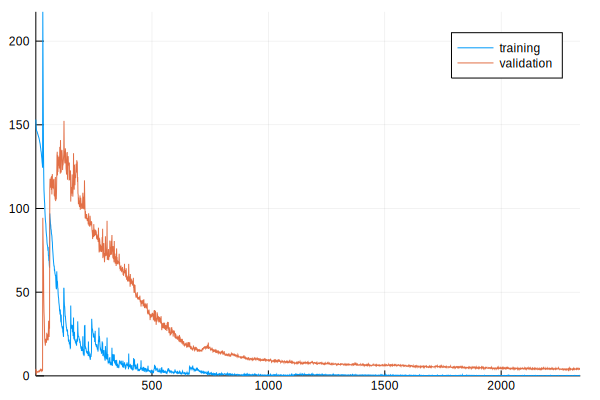

 50.513723 seconds (53.60 M allocations: 4.611 GiB, 3.58% gc time)


Progress:  78%|████████████████████████████████         |  ETA: 3:43:55

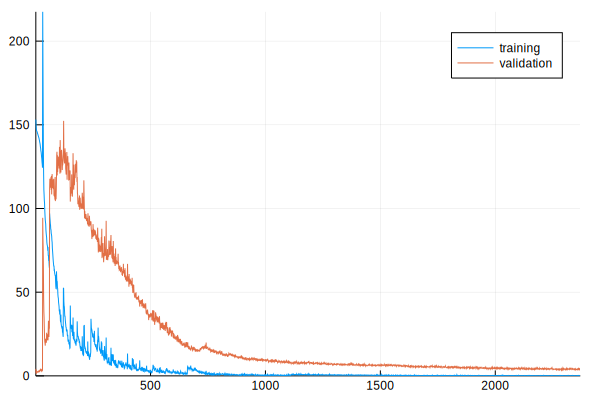

 51.243154 seconds (54.33 M allocations: 4.673 GiB, 3.65% gc time)


Progress:  79%|████████████████████████████████         |  ETA: 3:33:56

 51.476773 seconds (54.97 M allocations: 4.728 GiB, 2.83% gc time)


Progress:  80%|█████████████████████████████████        |  ETA: 3:23:38

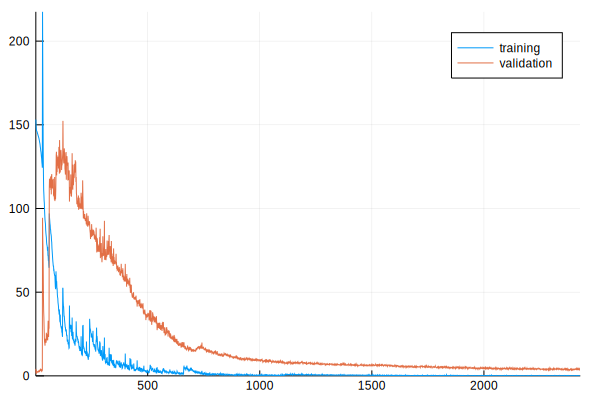

 52.287111 seconds (55.74 M allocations: 4.795 GiB, 3.23% gc time)


Progress:  81%|█████████████████████████████████        |  ETA: 3:13:57

 52.035758 seconds (56.22 M allocations: 4.837 GiB, 2.50% gc time)


Progress:  82%|██████████████████████████████████       |  ETA: 3:03:40

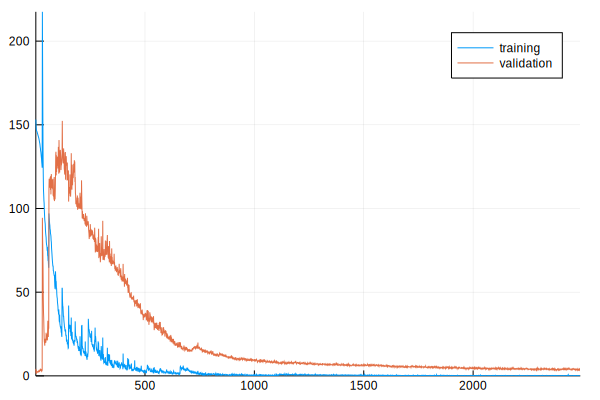

 53.350966 seconds (56.87 M allocations: 4.892 GiB, 3.51% gc time)


Progress:  83%|██████████████████████████████████       |  ETA: 2:53:31

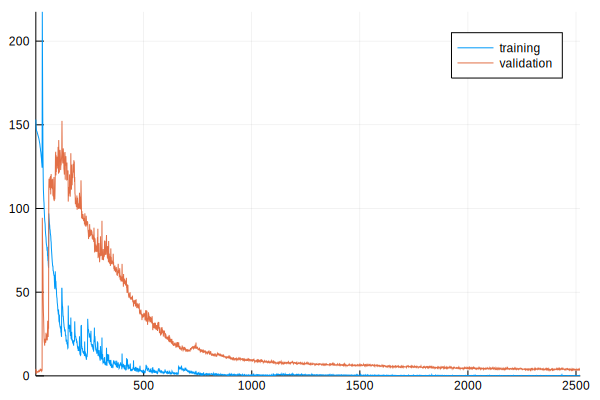

 53.788788 seconds (57.58 M allocations: 4.954 GiB, 3.25% gc time)


Progress:  84%|██████████████████████████████████       |  ETA: 2:43:36

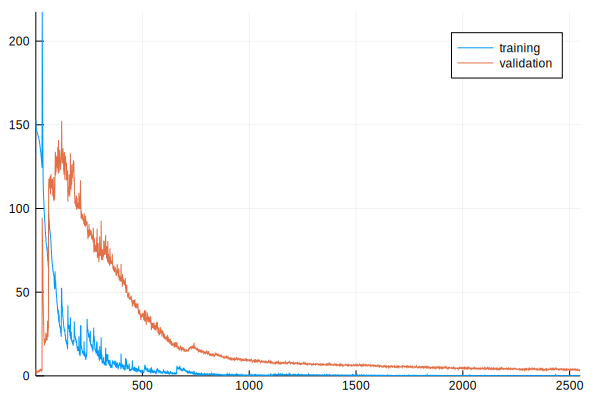

 54.020348 seconds (58.29 M allocations: 5.014 GiB, 2.52% gc time)


Progress:  85%|███████████████████████████████████      |  ETA: 2:33:35

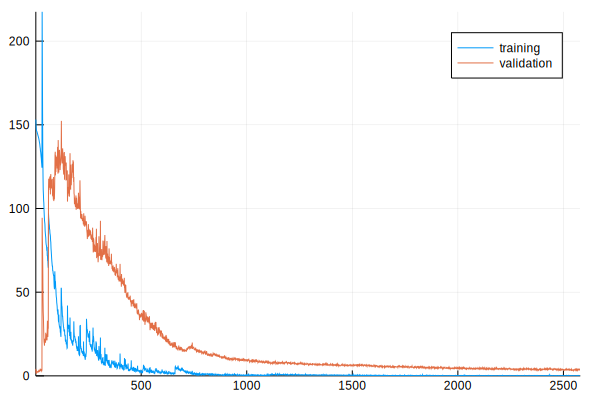

 55.486530 seconds (59.04 M allocations: 5.079 GiB, 3.49% gc time)


Progress:  86%|███████████████████████████████████      |  ETA: 2:23:36

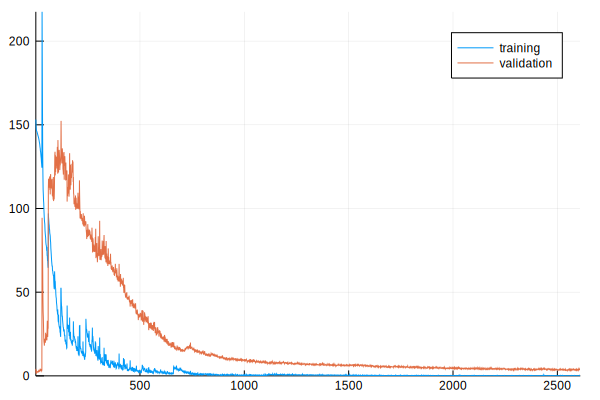

 56.375583 seconds (59.76 M allocations: 5.141 GiB, 3.47% gc time)


Progress:  87%|████████████████████████████████████     |  ETA: 2:13:27

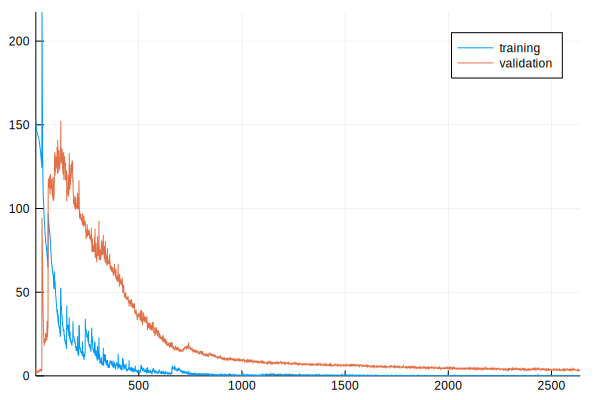

 56.415063 seconds (60.48 M allocations: 5.203 GiB, 3.01% gc time)


Progress:  88%|████████████████████████████████████     |  ETA: 2:03:20

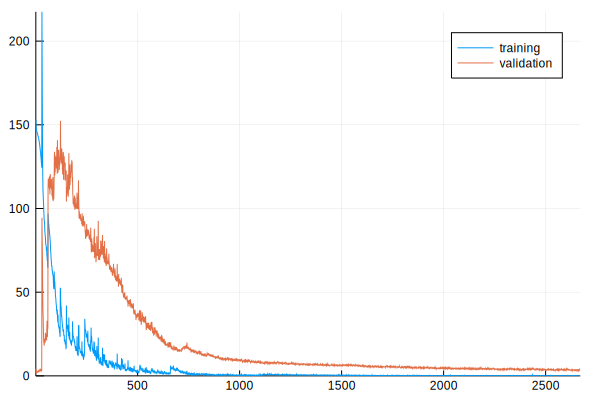

 57.685218 seconds (61.24 M allocations: 5.268 GiB, 2.98% gc time)


Progress:  89%|████████████████████████████████████     |  ETA: 1:53:08

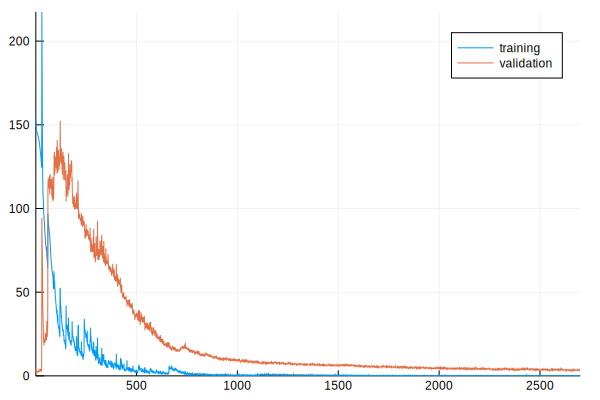

 58.290813 seconds (62.06 M allocations: 5.339 GiB, 3.49% gc time)


Progress:  90%|█████████████████████████████████████    |  ETA: 1:42:58

 59.014458 seconds (62.63 M allocations: 5.388 GiB, 3.40% gc time)


Progress:  91%|█████████████████████████████████████    |  ETA: 1:32:44

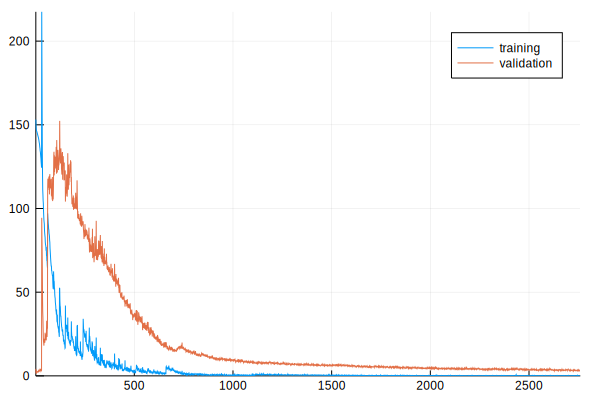

 59.253477 seconds (63.27 M allocations: 5.444 GiB, 3.31% gc time)


Progress:  92%|██████████████████████████████████████   |  ETA: 1:22:29

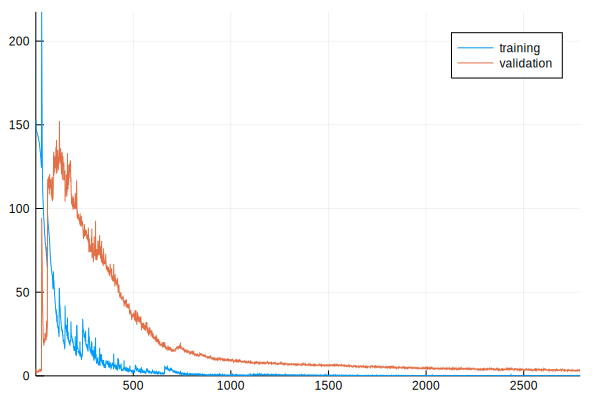

 59.894826 seconds (63.94 M allocations: 5.501 GiB, 3.34% gc time)


Progress:  93%|██████████████████████████████████████   |  ETA: 1:12:06

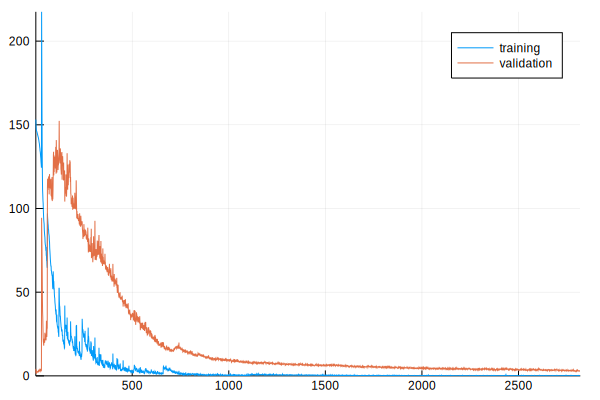

 60.641816 seconds (64.75 M allocations: 5.571 GiB, 3.02% gc time)


Progress:  94%|███████████████████████████████████████  |  ETA: 1:01:54

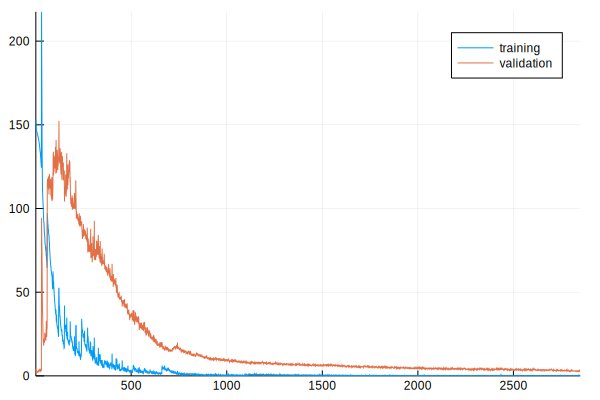

 61.224733 seconds (65.48 M allocations: 5.634 GiB, 3.28% gc time)


Progress:  95%|███████████████████████████████████████  |  ETA: 0:51:38

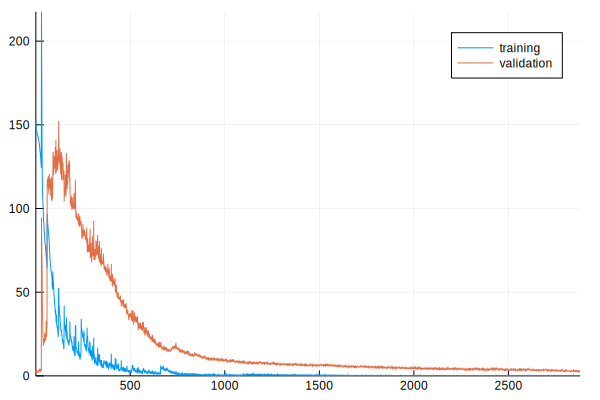

 62.305633 seconds (66.17 M allocations: 5.693 GiB, 3.47% gc time)


Progress:  96%|███████████████████████████████████████  |  ETA: 0:41:20

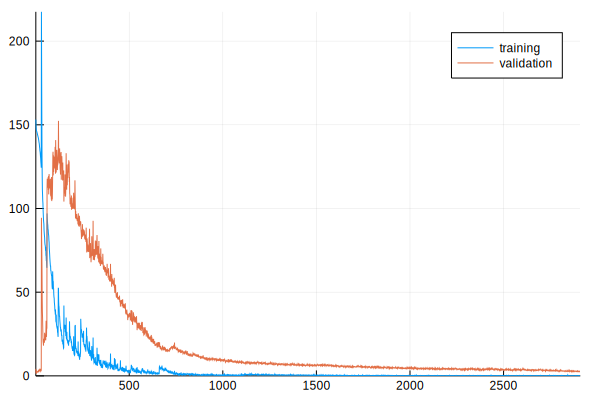

 62.161883 seconds (66.91 M allocations: 5.756 GiB, 2.62% gc time)


Progress:  97%|████████████████████████████████████████ |  ETA: 0:31:02

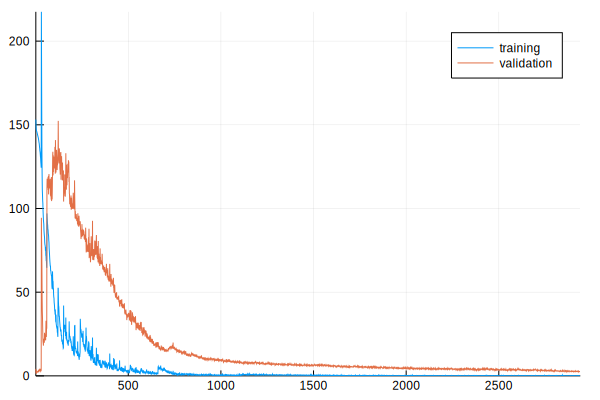

 63.628441 seconds (67.79 M allocations: 5.832 GiB, 3.48% gc time)


Progress:  98%|████████████████████████████████████████ |  ETA: 0:20:43

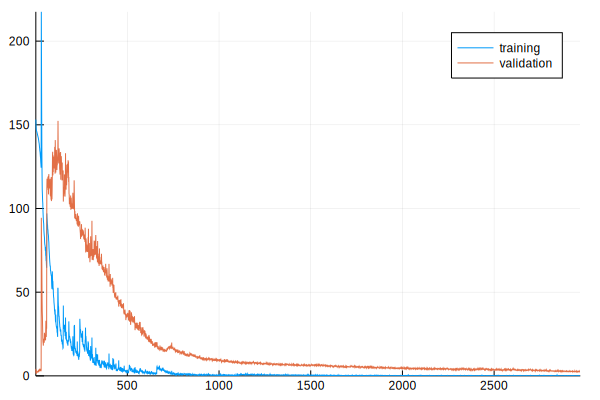

 64.363888 seconds (68.43 M allocations: 5.887 GiB, 3.53% gc time)


Progress:  99%|█████████████████████████████████████████|  ETA: 0:10:22

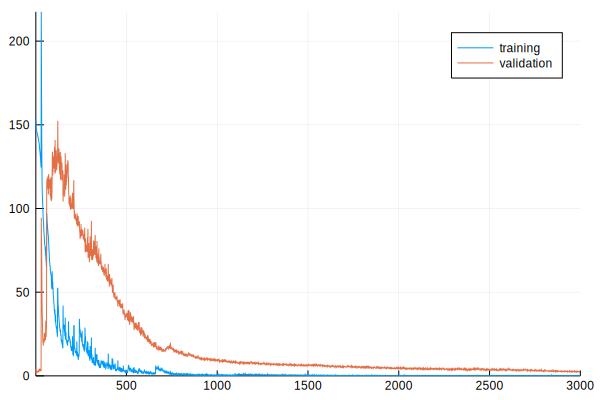

 64.162499 seconds (68.91 M allocations: 5.929 GiB, 2.53% gc time)


Progress: 100%|█████████████████████████████████████████| Time: 17:16:02


In [6]:
datasets = Vector{LearningMPC.Dataset{Float64}}()
all_training_data = Vector{Tuple{Vector{Float64}, Float64, Float64}}()
all_validation_data = Vector{Tuple{Vector{Float64}, Float64, Float64}}()
losses = Vector{Tuple{Float64, Float64}}()

N_iter = 100
σv = 3.0

@showprogress for i in 1:N_iter
    dataset = LearningMPC.Dataset(lqrsol)
    for i in 1:2
        collect_into!(dataset.training_data)
    end
    collect_into!(dataset.testing_data, i / N_iter * σv)
    collect_into!(dataset.validation_data, i / N_iter * σv)
    append!(all_training_data, features.(dataset.training_data))
    append!(all_validation_data, features.(dataset.validation_data))
    filter!(all_training_data) do sample
        all(isfinite, sample[1]) && isfinite(sample[2]) && isfinite(sample[3])
    end
    filter!(all_validation_data) do sample
        all(isfinite, sample[1]) && isfinite(sample[2]) && isfinite(sample[3])
    end
    
    @time for i in 1:30
        Flux.train!(loss, shuffleobs(all_training_data), optimizer)
        push!(losses, 
            (mean(xy -> Flux.Tracker.data(loss(xy...)), 
                  all_training_data),
             mean(xy -> Flux.Tracker.data(loss(xy...)), 
                  all_validation_data)))
    end
    push!(datasets, dataset)
    
    jldopen("boxatlas.jld2", "w") do file
        file["datasets"] = datasets
        file["net"] = net
        file["lqrsol"] = lqrsol
        file["mpc_params"] = Dict(
            "Δt" => params.Δt,
            "horizon" => params.horizon,
        )
        file["all_training_data"] = all_training_data
        file["all_validation_data"] = all_validation_data
        file["losses"] = losses
    end
    
    plt = plot(first.(losses), label="training")
    plot!(plt, last.(losses), label="validation")
    ylims!(plt, (0, ylims(plt)[2]))
    display(plt)
end

In [65]:
x0 = nominal_state(robot)
set_velocity!(x0, findjoint(robot.mechanism, "floating_base"), [-3, 0, 0])
results = LCPSim.simulate(x0, net_mpc_controller, environment(robot), 0.01, 300, params.lcp_solver);

In [68]:
set_configuration!(mvis, configuration(results[1].state))

In [69]:
playback(mvis, results, 0.05)